In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.DataFrame(dataset['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
dataset['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
X=df
y=dataset['target']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_trian,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [12]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


<Axes: >

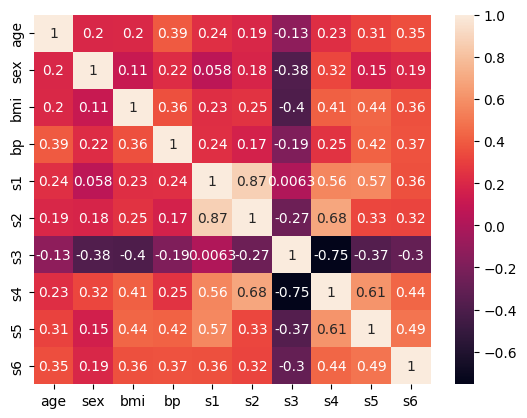

In [13]:
#Correlation
import seaborn as sns
sns.heatmap(X_train.corr(),annot=True)

In [14]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_trian)

DecisionTreeRegressor()

__HYPER PARAMETER TUNING__

In [15]:
param={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[i for i in range (1,25)],
    'max_features':['sqrt','log2']
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
dtreg=DecisionTreeRegressor()
grid=GridSearchCV(dtreg,param_grid=param,cv=5,verbose=3,scoring='neg_mean_squared_error')

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
grid.fit(X_train,y_trian)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=best;, score=-4079.385 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=best;, score=-4255.821 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=best;, score=-5320.903 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=best;, score=-4941.088 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=best;, score=-3975.563 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=random;, score=-6067.582 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=random;, score=-4353.596 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=random

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [20]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [21]:
prediction=grid.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test,prediction)

0.2590888689120979

__VISUALISATION__

In [24]:
model=DecisionTreeRegressor(criterion='squared_error',max_depth= 2,max_features= 'sqrt',splitter='best')
model.fit(X_train,y_trian)

DecisionTreeRegressor(max_depth=2, max_features='sqrt')

In [25]:
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'x[8] <= 0.022\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.5, 'x[2] <= 0.005\nsquared_error = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 2592.764\nsamples = 148\nvalue = 107.615'),
 Text(0.375, 0.16666666666666666, 'squared_error = 5372.564\nsamples = 57\nvalue = 164.544'),
 Text(0.75, 0.5, 'x[4] <= 0.05\nsquared_error = 4163.865\nsamples = 104\nvalue = 210.481'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 3828.426\nsamples = 66\nvalue = 224.424'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3822.299\nsamples = 38\nvalue = 186.263')]

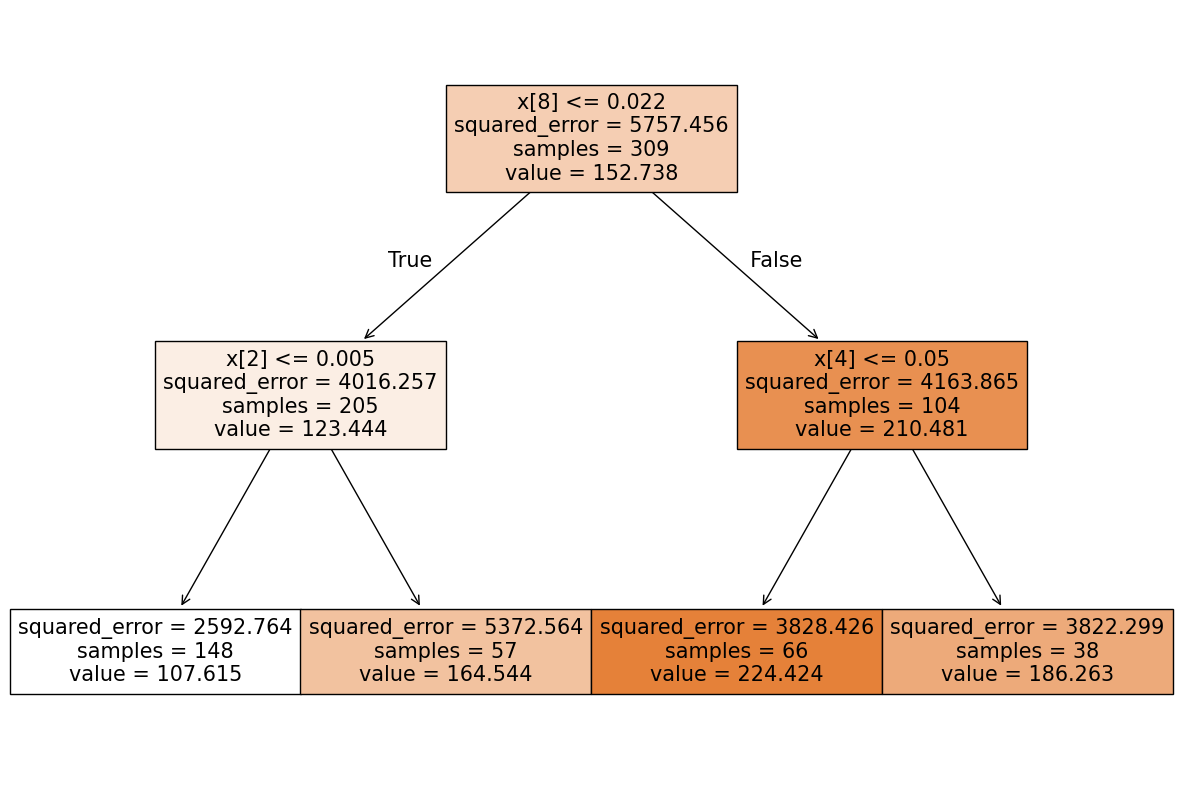

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

<Axes: ylabel='Density'>

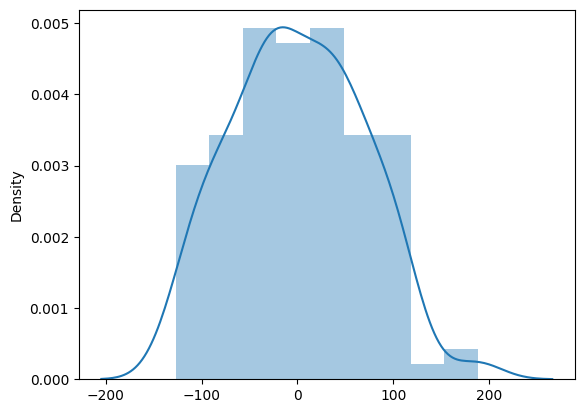

In [27]:
sns.distplot(y_test-prediction)